<a href="https://colab.research.google.com/github/bankshi/Soot-Blower/blob/main/Soot_Blower_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import matplotlib.dates as mdates
%matplotlib inline
%config InlineBackend.figure_format="retina"


from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)

In [6]:
dfSep2020 = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Soot/09soot operation data Sep20t.csv', skiprows=0)
dfSep2020.head()

,Unnamed: 0,GENERATOR MW,Weight average Al2O3 Input to Bolier,Weight average Ash Input to Boiler,Weight average CaO Input to Bolier,Weight average Carbon Input to Boiler,Weight average Chloride Input to Boiler,Weight average ESP K-Factor Input to Bolier,Weight average F.T. Input to Bolier,Weight average Fe2O3 Input to Bolier,Weight average Fixed Carbon Input to Bolier,Weight average fuel ratio Input to Bolier,Weight average Total Heat Input to Boiler,Weight average HGI Input to Boiler,Weight average Hydrogen Input to Bolier,Weight average K2O Input to Bolier,Weight average MgO Input to Bolier,Weight average Mn3O4 Input to Bolier,Weight average Na2O Input to Bolier,Weight average Nitrogen Input to Bolier,Weight average P2O5 Input to Bolier,Weight average SiO2 Input to Bolier,Weight average SO3 Input to Bolier,Weight average Ti2O Input to Bolier,Weight average Total Mositure Input to Boiler,Weight average Total Sulphur Input to Bolier,Weight average Volatile Matter Input to Boiler,TOTAL COAL FLOW,COAL FLOW-A,COAL FLOW-B,COAL FLOW-C,COAL FLOW-D,COAL FLOW-E,COAL FLOW-F,3RY SH OUTLET MAIN STEAM TEMP-A,3RY SH OUTLET MAIN STEAM TEMP-B,3RY SH INLET STEAM TEMP-A,3RY SH INLET STEAM TEMP-B,2RY SH OUTLET STEAM TEMP-B,2RY SH OUTLET STEAM TEMP-A,...,WALL DESLAGGER A-11 START,WALL DESLAGGER A-12 START,WALL DESLAGGER A-13 START,WALL DESLAGGER A-14 START,WALL DESLAGGER A-15 START,WALL DESLAGGER A-16 START,WALL DESLAGGER B-01 START,WALL DESLAGGER B-02 START,WALL DESLAGGER B-03 START,WALL DESLAGGER B-04 START,WALL DESLAGGER B-05 START,WALL DESLAGGER B-06 START,WALL DESLAGGER B-07 START,WALL DESLAGGER B-08 START,WALL DESLAGGER B-09 START,WALL DESLAGGER B-10 START,WALL DESLAGGER B-11 START,WALL DESLAGGER B-12 START,WALL DESLAGGER B-13 START,WALL DESLAGGER B-14 START,WALL DESLAGGER B-15 START,WALL DESLAGGER B-16 START,WALL DESLAGGER C-01 START,WALL DESLAGGER C-02 START,WALL DESLAGGER C-03 START,WALL DESLAGGER C-04 START,WALL DESLAGGER C-05 START,WALL DESLAGGER C-06 START,WALL DESLAGGER C-07 START,WALL DESLAGGER C-08 START,WALL DESLAGGER C-09 START,WALL DESLAGGER C-10 START,WALL DESLAGGER C-11 START,WALL DESLAGGER C-12 START,WALL DESLAGGER C-13 START,WALL DESLAGGER C-14 START,WALL DESLAGGER C-15 START,WALL DESLAGGER C-16 START,WALL DESLAGGER C-17 START,WALL DESLAGGER C-18 START
0,9/1/2020 0:00,704.400024,18.700003,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400009,1.92,0.84,12.1,0.37,36.399998,243.672150,0.032691,52.889999,52.810001,52.685558,52.664288,52.691666,541.176514,540.616821,469.258545,476.606567,485.735291,485.536591,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF
1,9/1/2020 0:01,703.700012,18.700001,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,241.073776,0.032699,52.299999,51.971252,51.942726,51.957775,52.507500,540.908813,541.287353,469.143311,477.119995,485.911774,485.758423,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF
2,9/1/2020 0:02,703.429260,18.700001,14.199998,2.49,61.400005,0.01,13.809860,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,244.709885,0.032707,52.152000,51.994999,52.064999,52.240002,52.064999,541.909363,541.589783,469.266998,476.412109,485.819672,486.045959,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF
3,9/1/2020 0:03,706.888245,18.700001,14.199998,2.49,61.400009,0.01,13.809859,1519.999878,4.449999,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.

In [7]:
dfSep2020.loc[:,'LONG RETRACTABLE SB RIGHT-01 START':'WALL DESLAGGER C-18 START'] = dfSep2020.loc[:,'LONG RETRACTABLE SB RIGHT-01 START':'WALL DESLAGGER C-18 START'].replace(['OFF','ON'],[0,1])


In [8]:
dfSep2020.head()

,Unnamed: 0,GENERATOR MW,Weight average Al2O3 Input to Bolier,Weight average Ash Input to Boiler,Weight average CaO Input to Bolier,Weight average Carbon Input to Boiler,Weight average Chloride Input to Boiler,Weight average ESP K-Factor Input to Bolier,Weight average F.T. Input to Bolier,Weight average Fe2O3 Input to Bolier,Weight average Fixed Carbon Input to Bolier,Weight average fuel ratio Input to Bolier,Weight average Total Heat Input to Boiler,Weight average HGI Input to Boiler,Weight average Hydrogen Input to Bolier,Weight average K2O Input to Bolier,Weight average MgO Input to Bolier,Weight average Mn3O4 Input to Bolier,Weight average Na2O Input to Bolier,Weight average Nitrogen Input to Bolier,Weight average P2O5 Input to Bolier,Weight average SiO2 Input to Bolier,Weight average SO3 Input to Bolier,Weight average Ti2O Input to Bolier,Weight average Total Mositure Input to Boiler,Weight average Total Sulphur Input to Bolier,Weight average Volatile Matter Input to Boiler,TOTAL COAL FLOW,COAL FLOW-A,COAL FLOW-B,COAL FLOW-C,COAL FLOW-D,COAL FLOW-E,COAL FLOW-F,3RY SH OUTLET MAIN STEAM TEMP-A,3RY SH OUTLET MAIN STEAM TEMP-B,3RY SH INLET STEAM TEMP-A,3RY SH INLET STEAM TEMP-B,2RY SH OUTLET STEAM TEMP-B,2RY SH OUTLET STEAM TEMP-A,...,WALL DESLAGGER A-11 START,WALL DESLAGGER A-12 START,WALL DESLAGGER A-13 START,WALL DESLAGGER A-14 START,WALL DESLAGGER A-15 START,WALL DESLAGGER A-16 START,WALL DESLAGGER B-01 START,WALL DESLAGGER B-02 START,WALL DESLAGGER B-03 START,WALL DESLAGGER B-04 START,WALL DESLAGGER B-05 START,WALL DESLAGGER B-06 START,WALL DESLAGGER B-07 START,WALL DESLAGGER B-08 START,WALL DESLAGGER B-09 START,WALL DESLAGGER B-10 START,WALL DESLAGGER B-11 START,WALL DESLAGGER B-12 START,WALL DESLAGGER B-13 START,WALL DESLAGGER B-14 START,WALL DESLAGGER B-15 START,WALL DESLAGGER B-16 START,WALL DESLAGGER C-01 START,WALL DESLAGGER C-02 START,WALL DESLAGGER C-03 START,WALL DESLAGGER C-04 START,WALL DESLAGGER C-05 START,WALL DESLAGGER C-06 START,WALL DESLAGGER C-07 START,WALL DESLAGGER C-08 START,WALL DESLAGGER C-09 START,WALL DESLAGGER C-10 START,WALL DESLAGGER C-11 START,WALL DESLAGGER C-12 START,WALL DESLAGGER C-13 START,WALL DESLAGGER C-14 START,WALL DESLAGGER C-15 START,WALL DESLAGGER C-16 START,WALL DESLAGGER C-17 START,WALL DESLAGGER C-18 START
0,9/1/2020 0:00,704.400024,18.700003,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400009,1.92,0.84,12.1,0.37,36.399998,243.672150,0.032691,52.889999,52.810001,52.685558,52.664288,52.691666,541.176514,540.616821,469.258545,476.606567,485.735291,485.536591,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9/1/2020 0:01,703.700012,18.700001,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,241.073776,0.032699,52.299999,51.971252,51.942726,51.957775,52.507500,540.908813,541.287353,469.143311,477.119995,485.911774,485.758423,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9/1/2020 0:02,703.429260,18.700001,14.199998,2.49,61.400005,0.01,13.809860,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,244.709885,0.032707,52.152000,51.994999,52.064999,52.240002,52.064999,541.909363,541.589783,469.266998,476.412109,485.819672,486.045959,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9/1/2020 0:03,706.888245,18.700001,14.199998,2.49,61.400009,0.01,13.809859,1519.999878,4.449999,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,240.953323,0.032715,51.955002,52.110001,52.104286,52.006668,51.989998,541.132385,540.939270,469.112762,476.466675,485.459015,485.860504,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
dfSep2020.rename(columns = {'Unnamed: 0':'Date'}, inplace=True)

In [10]:
dfSep2020 = dfSep2020.set_index('Date')

In [11]:
dfSep2020.head()

,GENERATOR MW,Weight average Al2O3 Input to Bolier,Weight average Ash Input to Boiler,Weight average CaO Input to Bolier,Weight average Carbon Input to Boiler,Weight average Chloride Input to Boiler,Weight average ESP K-Factor Input to Bolier,Weight average F.T. Input to Bolier,Weight average Fe2O3 Input to Bolier,Weight average Fixed Carbon Input to Bolier,Weight average fuel ratio Input to Bolier,Weight average Total Heat Input to Boiler,Weight average HGI Input to Boiler,Weight average Hydrogen Input to Bolier,Weight average K2O Input to Bolier,Weight average MgO Input to Bolier,Weight average Mn3O4 Input to Bolier,Weight average Na2O Input to Bolier,Weight average Nitrogen Input to Bolier,Weight average P2O5 Input to Bolier,Weight average SiO2 Input to Bolier,Weight average SO3 Input to Bolier,Weight average Ti2O Input to Bolier,Weight average Total Mositure Input to Boiler,Weight average Total Sulphur Input to Bolier,Weight average Volatile Matter Input to Boiler,TOTAL COAL FLOW,COAL FLOW-A,COAL FLOW-B,COAL FLOW-C,COAL FLOW-D,COAL FLOW-E,COAL FLOW-F,3RY SH OUTLET MAIN STEAM TEMP-A,3RY SH OUTLET MAIN STEAM TEMP-B,3RY SH INLET STEAM TEMP-A,3RY SH INLET STEAM TEMP-B,2RY SH OUTLET STEAM TEMP-B,2RY SH OUTLET STEAM TEMP-A,2RY DSH SPRAY WATER CV-A FB,...,WALL DESLAGGER A-11 START,WALL DESLAGGER A-12 START,WALL DESLAGGER A-13 START,WALL DESLAGGER A-14 START,WALL DESLAGGER A-15 START,WALL DESLAGGER A-16 START,WALL DESLAGGER B-01 START,WALL DESLAGGER B-02 START,WALL DESLAGGER B-03 START,WALL DESLAGGER B-04 START,WALL DESLAGGER B-05 START,WALL DESLAGGER B-06 START,WALL DESLAGGER B-07 START,WALL DESLAGGER B-08 START,WALL DESLAGGER B-09 START,WALL DESLAGGER B-10 START,WALL DESLAGGER B-11 START,WALL DESLAGGER B-12 START,WALL DESLAGGER B-13 START,WALL DESLAGGER B-14 START,WALL DESLAGGER B-15 START,WALL DESLAGGER B-16 START,WALL DESLAGGER C-01 START,WALL DESLAGGER C-02 START,WALL DESLAGGER C-03 START,WALL DESLAGGER C-04 START,WALL DESLAGGER C-05 START,WALL DESLAGGER C-06 START,WALL DESLAGGER C-07 START,WALL DESLAGGER C-08 START,WALL DESLAGGER C-09 START,WALL DESLAGGER C-10 START,WALL DESLAGGER C-11 START,WALL DESLAGGER C-12 START,WALL DESLAGGER C-13 START,WALL DESLAGGER C-14 START,WALL DESLAGGER C-15 START,WALL DESLAGGER C-16 START,WALL DESLAGGER C-17 START,WALL DESLAGGER C-18 START
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9/1/2020 0:00,704.400024,18.700003,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400009,1.92,0.84,12.1,0.37,36.399998,243.672150,0.032691,52.889999,52.810001,52.685558,52.664288,52.691666,541.176514,540.616821,469.258545,476.606567,485.735291,485.536591,27.119999,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9/1/2020 0:01,703.700012,18.700001,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,241.073776,0.032699,52.299999,51.971252,51.942726,51.957775,52.507500,540.908813,541.287353,469.143311,477.119995,485.911774,485.758423,27.209999,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9/1/2020 0:02,703.429260,18.700001,14.199998,2.49,61.400005,0.01,13.809860,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,244.709885,0.032707,52.152000,51.994999,52.064999,52.240002,52.064999,541.909363,541.589783,469.266998,476.412109,485.819672,486.045959,29.765715,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9/1/2020 0:03,706.888245,18.700001,14.199998,2.49,61.400009,0.01,13.809859,1519.999878,4.449999,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,240.953323,0.032715,51.955002,52.110001,52.104286,52.006668,51.9899

In [12]:
dfSep2020.dropna(inplace = True)

## ***Train Model***

---



In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import  make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [15]:
print(dfSep2020.iloc[:, 106:186].columns)

Index(['LONG RETRACTABLE SB RIGHT-01 START',
       'LONG RETRACTABLE SB RIGHT-02 START',
       'LONG RETRACTABLE SB RIGHT-03 START',
       'LONG RETRACTABLE SB RIGHT-04 START',
       'LONG RETRACTABLE SB RIGHT-05 START',
       'LONG RETRACTABLE SB RIGHT-06 START',
       'LONG RETRACTABLE SB RIGHT-07 START',
       'LONG RETRACTABLE SB RIGHT-08 START',
       'LONG RETRACTABLE SB RIGHT-09 START',
       'LONG RETRACTABLE SB RIGHT-10 START',
       'LONG RETRACTABLE SB RIGHT-11 START',
       'LONG RETRACTABLE SB RIGHT-12 START',
       'LONG RETRACTABLE SB RIGHT-13 START',
       'LONG RETRACTABLE SB RIGHT-14 START',
       'LONG RETRACTABLE SB RIGHT-15 START',
       'LONG RETRACTABLE SB LEFT-01 START',
       'LONG RETRACTABLE SB LEFT-02 START',
       'LONG RETRACTABLE SB LEFT-03 START',
       'LONG RETRACTABLE SB LEFT-04 START',
       'LONG RETRACTABLE SB LEFT-05 START',
       'LONG RETRACTABLE SB LEFT-06 START',
       'LONG RETRACTABLE SB LEFT-07 START',
       'LONG RETR

In [16]:
df= dfSep2020.iloc[:, :33]
df['ECO OUTLET GAS O2 (LOW SELECT)'] = dfSep2020['ECO OUTLET GAS O2 (LOW SELECT)']
df['BURNER TILT'] = dfSep2020['BURNER TILT']
df[['LONG RETRACTABLE SB RIGHT-01 START',
       'LONG RETRACTABLE SB RIGHT-02 START',
       'LONG RETRACTABLE SB RIGHT-03 START',
       'LONG RETRACTABLE SB RIGHT-04 START',
       'LONG RETRACTABLE SB RIGHT-05 START',
       'LONG RETRACTABLE SB RIGHT-06 START',
       'LONG RETRACTABLE SB RIGHT-07 START',
       'LONG RETRACTABLE SB RIGHT-08 START',
       'LONG RETRACTABLE SB RIGHT-09 START',
       'LONG RETRACTABLE SB RIGHT-10 START',
       'LONG RETRACTABLE SB RIGHT-11 START',
       'LONG RETRACTABLE SB RIGHT-12 START',
       'LONG RETRACTABLE SB RIGHT-13 START',
       'LONG RETRACTABLE SB RIGHT-14 START',
       'LONG RETRACTABLE SB RIGHT-15 START',
       'LONG RETRACTABLE SB LEFT-01 START',
       'LONG RETRACTABLE SB LEFT-02 START',
       'LONG RETRACTABLE SB LEFT-03 START',
       'LONG RETRACTABLE SB LEFT-04 START',
       'LONG RETRACTABLE SB LEFT-05 START',
       'LONG RETRACTABLE SB LEFT-06 START',
       'LONG RETRACTABLE SB LEFT-07 START',
       'LONG RETRACTABLE SB LEFT-08 START',
       'LONG RETRACTABLE SB LEFT-09 START',
       'LONG RETRACTABLE SB LEFT-10 START',
       'LONG RETRACTABLE SB LEFT-11 START',
       'LONG RETRACTABLE SB LEFT-12 START',
       'LONG RETRACTABLE SB LEFT-13 START',
       'LONG RETRACTABLE SB LEFT-14 START',
       'LONG RETRACTABLE SB LEFT-15 START', 'WALL DESLAGGER A-01 START',
       'WALL DESLAGGER A-02 START', 'WALL DESLAGGER A-03 START',
       'WALL DESLAGGER A-04 START', 'WALL DESLAGGER A-05 START',
       'WALL DESLAGGER A-06 START', 'WALL DESLAGGER A-07 START',
       'WALL DESLAGGER A-08 START', 'WALL DESLAGGER A-09 START',
       'WALL DESLAGGER A-10 START', 'WALL DESLAGGER A-11 START',
       'WALL DESLAGGER A-12 START', 'WALL DESLAGGER A-13 START',
       'WALL DESLAGGER A-14 START', 'WALL DESLAGGER A-15 START',
       'WALL DESLAGGER A-16 START', 'WALL DESLAGGER B-01 START',
       'WALL DESLAGGER B-02 START', 'WALL DESLAGGER B-03 START',
       'WALL DESLAGGER B-04 START', 'WALL DESLAGGER B-05 START',
       'WALL DESLAGGER B-06 START', 'WALL DESLAGGER B-07 START',
       'WALL DESLAGGER B-08 START', 'WALL DESLAGGER B-09 START',
       'WALL DESLAGGER B-10 START', 'WALL DESLAGGER B-11 START',
       'WALL DESLAGGER B-12 START', 'WALL DESLAGGER B-13 START',
       'WALL DESLAGGER B-14 START', 'WALL DESLAGGER B-15 START',
       'WALL DESLAGGER B-16 START', 'WALL DESLAGGER C-01 START',
       'WALL DESLAGGER C-02 START', 'WALL DESLAGGER C-03 START',
       'WALL DESLAGGER C-04 START', 'WALL DESLAGGER C-05 START',
       'WALL DESLAGGER C-06 START', 'WALL DESLAGGER C-07 START',
       'WALL DESLAGGER C-08 START', 'WALL DESLAGGER C-09 START',
       'WALL DESLAGGER C-10 START', 'WALL DESLAGGER C-11 START',
       'WALL DESLAGGER C-12 START', 'WALL DESLAGGER C-13 START',
       'WALL DESLAGGER C-14 START', 'WALL DESLAGGER C-15 START',
       'WALL DESLAGGER C-16 START', 'WALL DESLAGGER C-17 START',
       'WALL DESLAGGER C-18 START']] = dfSep2020[['LONG RETRACTABLE SB RIGHT-01 START',
       'LONG RETRACTABLE SB RIGHT-02 START',
       'LONG RETRACTABLE SB RIGHT-03 START',
       'LONG RETRACTABLE SB RIGHT-04 START',
       'LONG RETRACTABLE SB RIGHT-05 START',
       'LONG RETRACTABLE SB RIGHT-06 START',
       'LONG RETRACTABLE SB RIGHT-07 START',
       'LONG RETRACTABLE SB RIGHT-08 START',
       'LONG RETRACTABLE SB RIGHT-09 START',
       'LONG RETRACTABLE SB RIGHT-10 START',
       'LONG RETRACTABLE SB RIGHT-11 START',
       'LONG RETRACTABLE SB RIGHT-12 START',
       'LONG RETRACTABLE SB RIGHT-13 START',
       'LONG RETRACTABLE SB RIGHT-14 START',
       'LONG RETRACTABLE SB RIGHT-15 START',
       'LONG RETRACTABLE SB LEFT-01 START',
       'LONG RETRACTABLE SB LEFT-02 START',
       'LONG RETRACTABLE SB LEFT-03 START',
       'LONG RETRACTABLE SB LEFT-04 START',
       'LONG RETRACTABLE SB LEFT-05 START',
       'LONG RETRACTABLE SB LEFT-06 START',
       'LONG RETRACTABLE SB LEFT-07 START',
       'LONG RETRACTABLE SB LEFT-08 START',
       'LONG RETRACTABLE SB LEFT-09 START',
       'LONG RETRACTABLE SB LEFT-10 START',
       'LONG RETRACTABLE SB LEFT-11 START',
       'LONG RETRACTABLE SB LEFT-12 START',
       'LONG RETRACTABLE SB LEFT-13 START',
       'LONG RETRACTABLE SB LEFT-14 START',
       'LONG RETRACTABLE SB LEFT-15 START', 'WALL DESLAGGER A-01 START',
       'WALL DESLAGGER A-02 START', 'WALL DESLAGGER A-03 START',
       'WALL DESLAGGER A-04 START', 'WALL DESLAGGER A-05 START',
       'WALL DESLAGGER A-06 START', 'WALL DESLAGGER A-07 START',
       'WALL DESLAGGER A-08 START', 'WALL DESLAGGER A-09 START',
       'WALL DESLAGGER A-10 START', 'WALL DESLAGGER A-11 START',
       'WALL DESLAGGER A-12 START', 'WALL DESLAGGER A-13 START',
       'WALL DESLAGGER A-14 START', 'WALL DESLAGGER A-15 START',
       'WALL DESLAGGER A-16 START', 'WALL DESLAGGER B-01 START',
       'WALL DESLAGGER B-02 START', 'WALL DESLAGGER B-03 START',
       'WALL DESLAGGER B-04 START', 'WALL DESLAGGER B-05 START',
       'WALL DESLAGGER B-06 START', 'WALL DESLAGGER B-07 START',
       'WALL DESLAGGER B-08 START', 'WALL DESLAGGER B-09 START',
       'WALL DESLAGGER B-10 START', 'WALL DESLAGGER B-11 START',
       'WALL DESLAGGER B-12 START', 'WALL DESLAGGER B-13 START',
       'WALL DESLAGGER B-14 START', 'WALL DESLAGGER B-15 START',
       'WALL DESLAGGER B-16 START', 'WALL DESLAGGER C-01 START',
       'WALL DESLAGGER C-02 START', 'WALL DESLAGGER C-03 START',
       'WALL DESLAGGER C-04 START', 'WALL DESLAGGER C-05 START',
       'WALL DESLAGGER C-06 START', 'WALL DESLAGGER C-07 START',
       'WALL DESLAGGER C-08 START', 'WALL DESLAGGER C-09 START',
       'WALL DESLAGGER C-10 START', 'WALL DESLAGGER C-11 START',
       'WALL DESLAGGER C-12 START', 'WALL DESLAGGER C-13 START',
       'WALL DESLAGGER C-14 START', 'WALL DESLAGGER C-15 START',
       'WALL DESLAGGER C-16 START', 'WALL DESLAGGER C-17 START',
       'WALL DESLAGGER C-18 START']]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43201 entries, 9/1/2020 0:00 to 10/1/2020 0:00
Columns: 115 entries, GENERATOR MW to WALL DESLAGGER C-18 START
dtypes: float64(35), int64(80)
memory usage: 38.2+ MB


In [ ]:
#sns.pairplot(df)

In [18]:
df['LONG RETRACTABLE SB RIGHT-14 START'].head(10)

Date
9/1/2020 0:00    1
9/1/2020 0:01    1
9/1/2020 0:02    1
9/1/2020 0:03    1
9/1/2020 0:04    1
9/1/2020 0:05    1
9/1/2020 0:06    1
9/1/2020 0:07    0
9/1/2020 0:08    0
9/1/2020 0:09    0
Name: LONG RETRACTABLE SB RIGHT-14 START, dtype: int64

In [19]:
df.head()

,GENERATOR MW,Weight average Al2O3 Input to Bolier,Weight average Ash Input to Boiler,Weight average CaO Input to Bolier,Weight average Carbon Input to Boiler,Weight average Chloride Input to Boiler,Weight average ESP K-Factor Input to Bolier,Weight average F.T. Input to Bolier,Weight average Fe2O3 Input to Bolier,Weight average Fixed Carbon Input to Bolier,Weight average fuel ratio Input to Bolier,Weight average Total Heat Input to Boiler,Weight average HGI Input to Boiler,Weight average Hydrogen Input to Bolier,Weight average K2O Input to Bolier,Weight average MgO Input to Bolier,Weight average Mn3O4 Input to Bolier,Weight average Na2O Input to Bolier,Weight average Nitrogen Input to Bolier,Weight average P2O5 Input to Bolier,Weight average SiO2 Input to Bolier,Weight average SO3 Input to Bolier,Weight average Ti2O Input to Bolier,Weight average Total Mositure Input to Boiler,Weight average Total Sulphur Input to Bolier,Weight average Volatile Matter Input to Boiler,TOTAL COAL FLOW,COAL FLOW-A,COAL FLOW-B,COAL FLOW-C,COAL FLOW-D,COAL FLOW-E,COAL FLOW-F,ECO OUTLET GAS O2 (LOW SELECT),BURNER TILT,LONG RETRACTABLE SB RIGHT-01 START,LONG RETRACTABLE SB RIGHT-02 START,LONG RETRACTABLE SB RIGHT-03 START,LONG RETRACTABLE SB RIGHT-04 START,LONG RETRACTABLE SB RIGHT-05 START,...,WALL DESLAGGER A-11 START,WALL DESLAGGER A-12 START,WALL DESLAGGER A-13 START,WALL DESLAGGER A-14 START,WALL DESLAGGER A-15 START,WALL DESLAGGER A-16 START,WALL DESLAGGER B-01 START,WALL DESLAGGER B-02 START,WALL DESLAGGER B-03 START,WALL DESLAGGER B-04 START,WALL DESLAGGER B-05 START,WALL DESLAGGER B-06 START,WALL DESLAGGER B-07 START,WALL DESLAGGER B-08 START,WALL DESLAGGER B-09 START,WALL DESLAGGER B-10 START,WALL DESLAGGER B-11 START,WALL DESLAGGER B-12 START,WALL DESLAGGER B-13 START,WALL DESLAGGER B-14 START,WALL DESLAGGER B-15 START,WALL DESLAGGER B-16 START,WALL DESLAGGER C-01 START,WALL DESLAGGER C-02 START,WALL DESLAGGER C-03 START,WALL DESLAGGER C-04 START,WALL DESLAGGER C-05 START,WALL DESLAGGER C-06 START,WALL DESLAGGER C-07 START,WALL DESLAGGER C-08 START,WALL DESLAGGER C-09 START,WALL DESLAGGER C-10 START,WALL DESLAGGER C-11 START,WALL DESLAGGER C-12 START,WALL DESLAGGER C-13 START,WALL DESLAGGER C-14 START,WALL DESLAGGER C-15 START,WALL DESLAGGER C-16 START,WALL DESLAGGER C-17 START,WALL DESLAGGER C-18 START
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9/1/2020 0:00,704.400024,18.700003,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400009,1.92,0.84,12.1,0.37,36.399998,243.672150,0.032691,52.889999,52.810001,52.685558,52.664288,52.691666,2.288957,14.446409,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9/1/2020 0:01,703.700012,18.700001,14.199998,2.49,61.399998,0.01,13.809859,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,241.073776,0.032699,52.299999,51.971252,51.942726,51.957775,52.507500,2.282417,14.395925,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9/1/2020 0:02,703.429260,18.700001,14.199998,2.49,61.400005,0.01,13.809860,1520.000122,4.450000,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,244.709885,0.032707,52.152000,51.994999,52.064999,52.240002,52.064999,2.259311,14.316013,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9/1/2020 0:03,706.888245,18.700001,14.199998,2.49,61.400009,0.01,13.809859,1519.999878,4.449999,46.799995,1.747253,24890.52539,47.999996,3.71,0.42,1.27,0.1,0.53,1.42,0.05,68.400002,1.92,0.84,12.1,0.37,36.399998,240.953323,0.032715,51.955002,52.110001,52.104286,52.006668,51.989998,2.242667,14.251188,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9/1/2

In [20]:
X=df.iloc[:, :115].values

In [21]:
X

array([[704.4000244 ,  18.70000267,  14.1999979 , ...,   0.        ,
          0.        ,   0.        ],
       [703.7000122 ,  18.70000076,  14.1999979 , ...,   0.        ,
          0.        ,   0.        ],
       [703.4292603 ,  18.70000076,  14.1999979 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [703.9928589 ,  19.9997673 ,  14.60000992, ...,   0.        ,
          0.        ,   0.        ],
       [702.8499756 ,  19.9997673 ,  14.60000992, ...,   0.        ,
          0.        ,   0.        ],
       [703.4529419 ,  19.9997673 ,  14.60000992, ...,   0.        ,
          0.        ,   0.        ]])

In [22]:
Y=dfSep2020.iloc[:, 69].values

In [23]:
Y

array([540.9749756, 541.18927  , 541.3343506, ..., 539.2026978,
       539.0343628, 539.24646  ])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# **LinearRegression()**




In [25]:
model = linear_model.LinearRegression()

In [26]:
pipe = make_pipeline(model)
pipe

Pipeline(memory=None,
         steps=[('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [27]:
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.45911854093262805

In [28]:
y_pred = model.predict(X_test)

In [29]:
df=pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten() })
df.head()

,Actually,Predicted
0,538.676331,541.073301
1,542.395142,540.616692
2,538.788208,539.908414
3,542.092651,541.579624
4,537.961792,538.400867


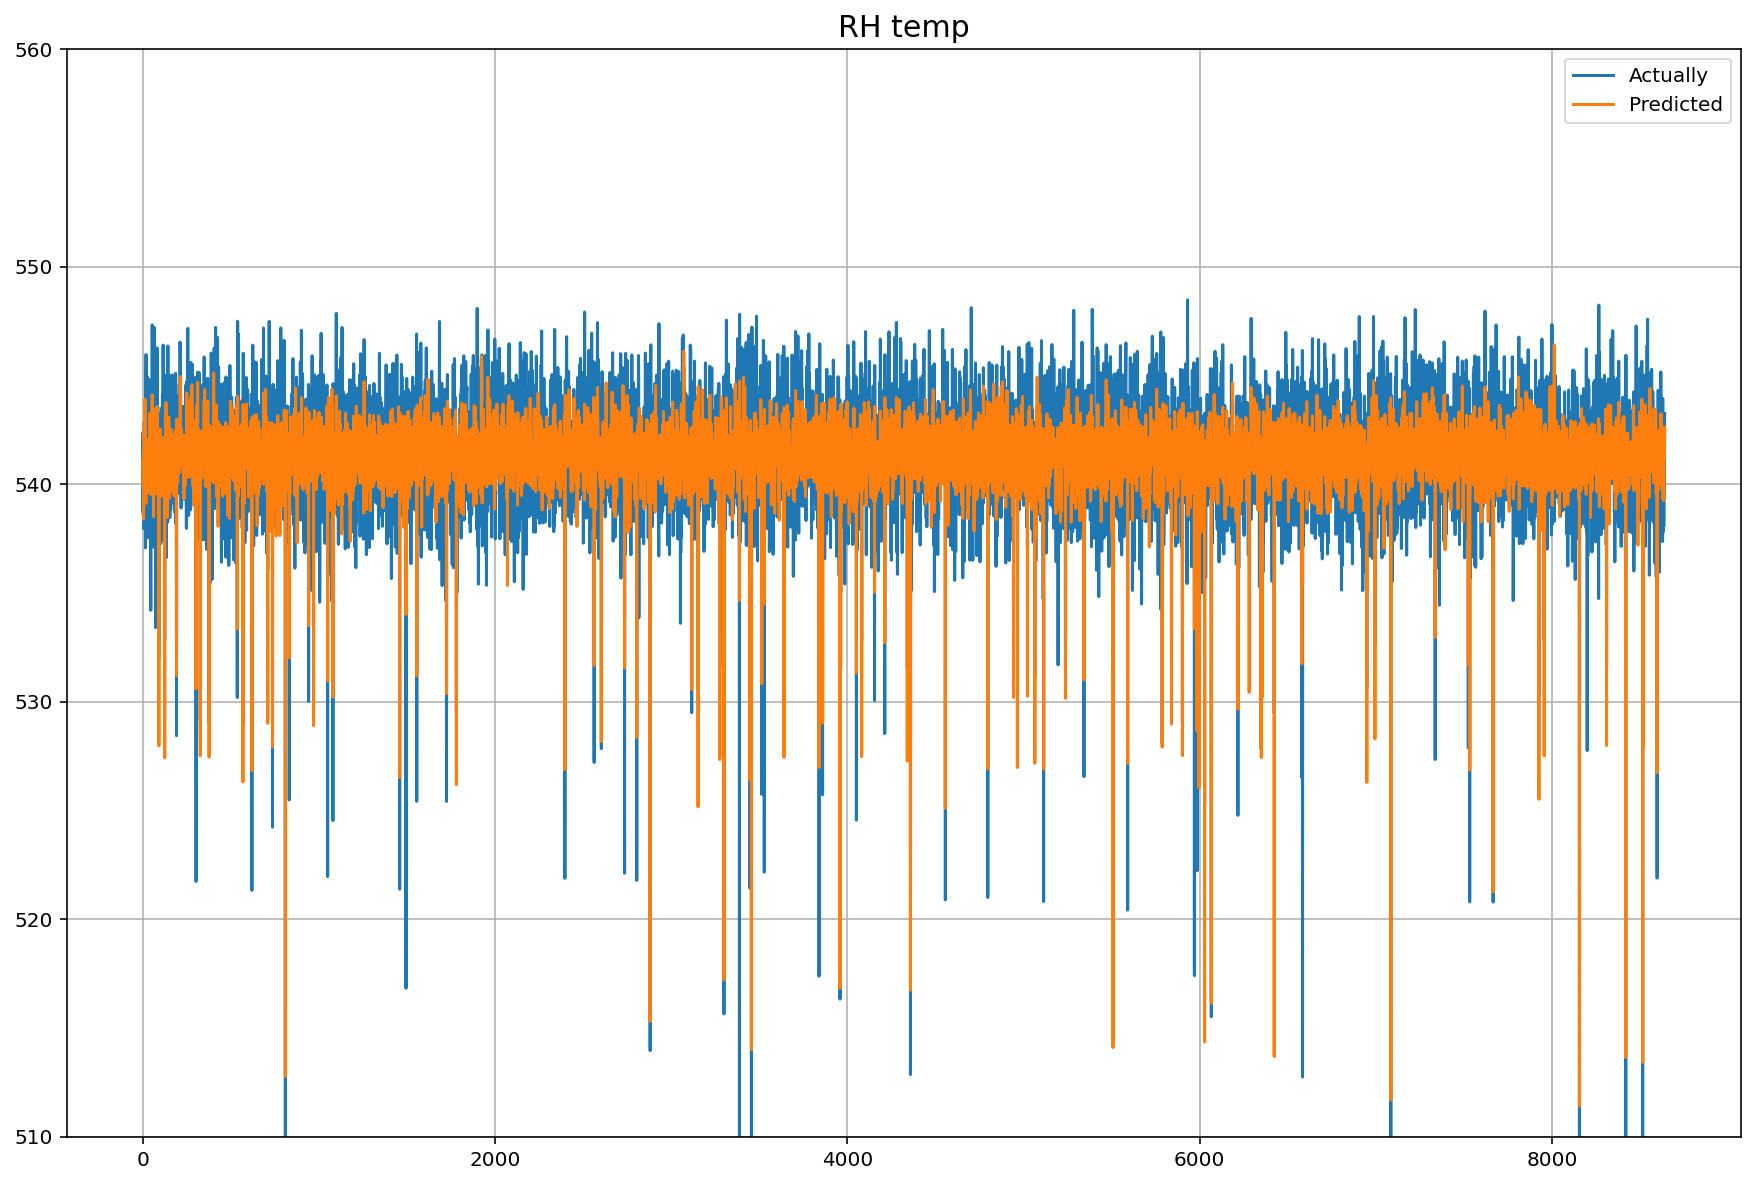

In [30]:
ax = df[['Actually', 'Predicted']].plot()
ax.set_ylim([510, 560])
plt.grid()
plt.title('RH temp', size=15);

# **BayesianRidge()**

In [31]:
model = linear_model.BayesianRidge()

In [32]:
pipe = make_pipeline(model)
pipe

Pipeline(memory=None,
         steps=[('bayesianridge',
                 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                               compute_score=False, copy_X=True,
                               fit_intercept=True, lambda_1=1e-06,
                               lambda_2=1e-06, lambda_init=None, n_iter=300,
                               normalize=False, tol=0.001, verbose=False))],
         verbose=False)

In [33]:
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.4581960677547101

In [34]:
y_pred = model.predict(X_test)

In [35]:
df=pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten() })
df.head()

,Actually,Predicted
0,538.676331,541.100492
1,542.395142,540.629933
2,538.788208,539.991553
3,542.092651,541.596508
4,537.961792,538.471186


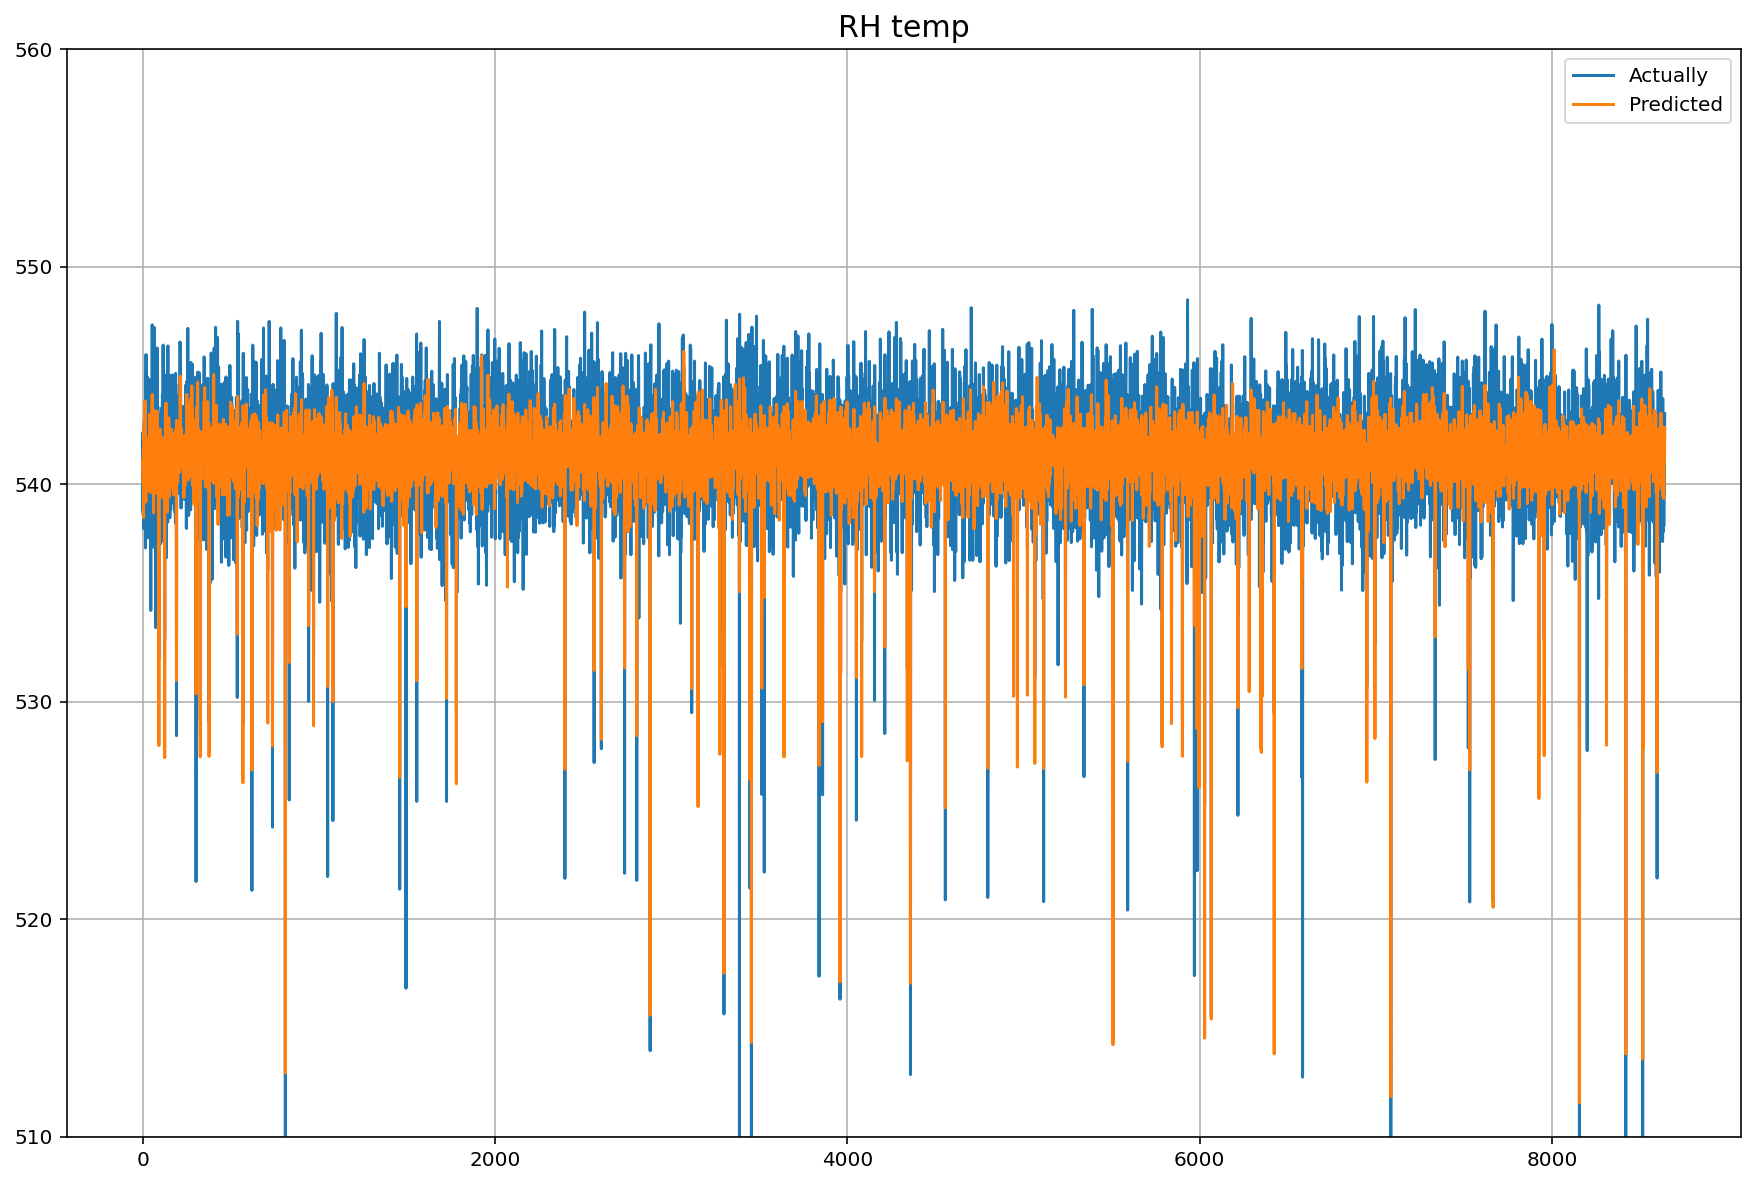

In [36]:
ax = df[['Actually', 'Predicted']].plot()
ax.set_ylim([510, 560])
plt.grid()
plt.title('RH temp', size=15);

# **Polynomial**

In [37]:
#from sklearn.preprocessing import PolynomialFeatures

In [38]:
#poly = PolynomialFeatures(2)

In [39]:
#pipe = make_pipeline(poly)
#pipe

In [40]:
#X_train2 = poly.fit_transform(X_train)
#X_test2 = poly.fit_transform(X_test)

In [41]:
#model = linear_model.LinearRegression()

In [42]:
#model.fit(X_train2,y_train)
#model.score(X_test2, y_test)

In [43]:
#y_pred = model.predict(X_test2)

In [44]:
#df=pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten() })
#df.head()

In [45]:
#ax = df[['Actually', 'Predicted']].plot()
#ax.set_ylim([510, 560])
#plt.grid()
#plt.title('RH temp', size=15);

# **DecisionTreeRegressor**

In [46]:
model = DecisionTreeRegressor(random_state = 0)

In [47]:
pipe = make_pipeline(model)
pipe

Pipeline(memory=None,
         steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=0,
                                       splitter='best'))],
         verbose=False)

In [48]:
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.3572553038233922

In [49]:
y_pred = model.predict(X_test)

In [50]:
df=pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten() })
df.head()

,Actually,Predicted
0,538.676331,541.255981
1,542.395142,539.701721
2,538.788208,540.006165
3,542.092651,543.343567
4,537.961792,538.325623


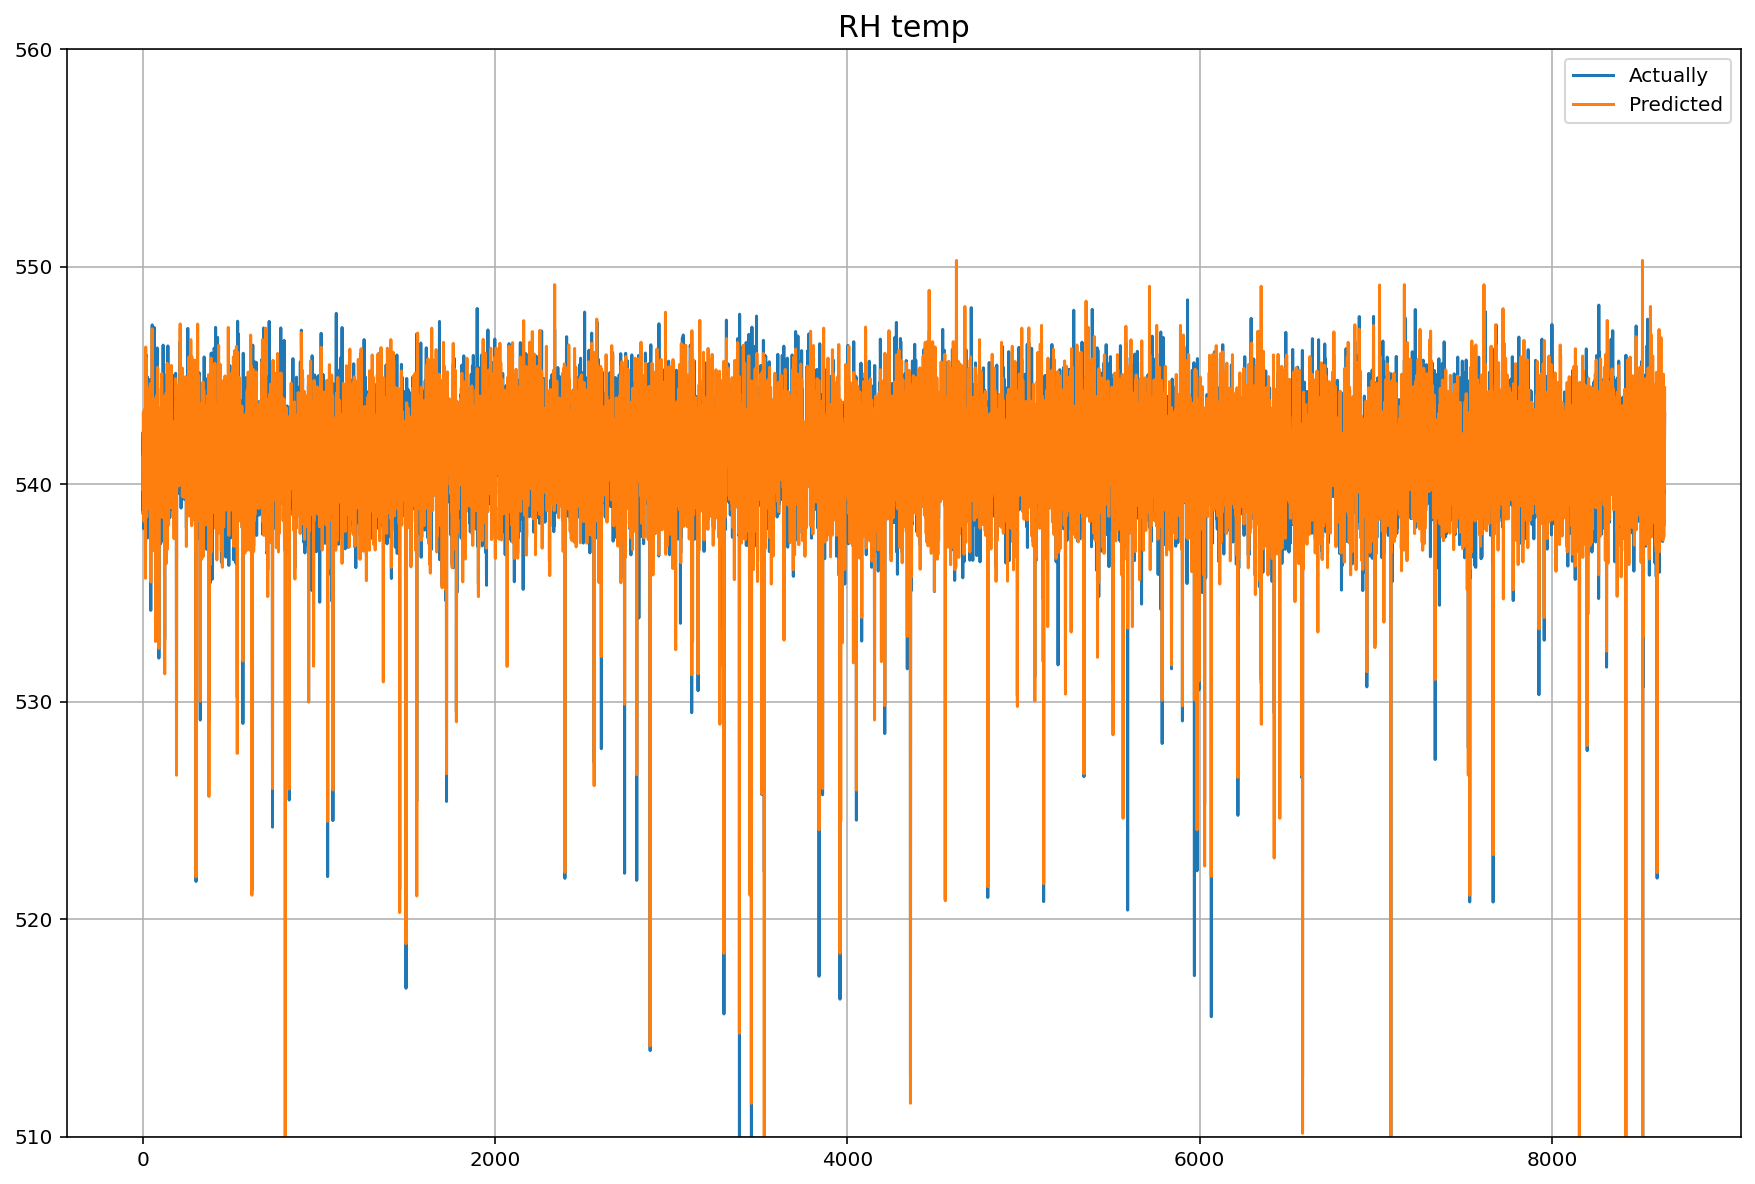

In [51]:
ax = df[['Actually', 'Predicted']].plot()
ax.set_ylim([510, 560])
plt.grid()
plt.title('RH temp', size=15);

# **MLPRegressor**

In [52]:
from sklearn import preprocessing as pre

In [53]:
scaler = pre.StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
model = MLPRegressor(random_state=0)

In [56]:
pipe = make_pipeline(model)
pipe

Pipeline(memory=None,
         steps=[('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=200, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=0, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [57]:
pipe.fit(X_train_scaled,y_train)
pipe.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-12.373024808218236

In [58]:
y_pred = model.predict(X_test_scaled)

In [59]:
df=pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten() })
df.head()

,Actually,Predicted
0,538.676331,538.940401
1,542.395142,540.216084
2,538.788208,544.601409
3,542.092651,540.909059
4,537.961792,537.083956


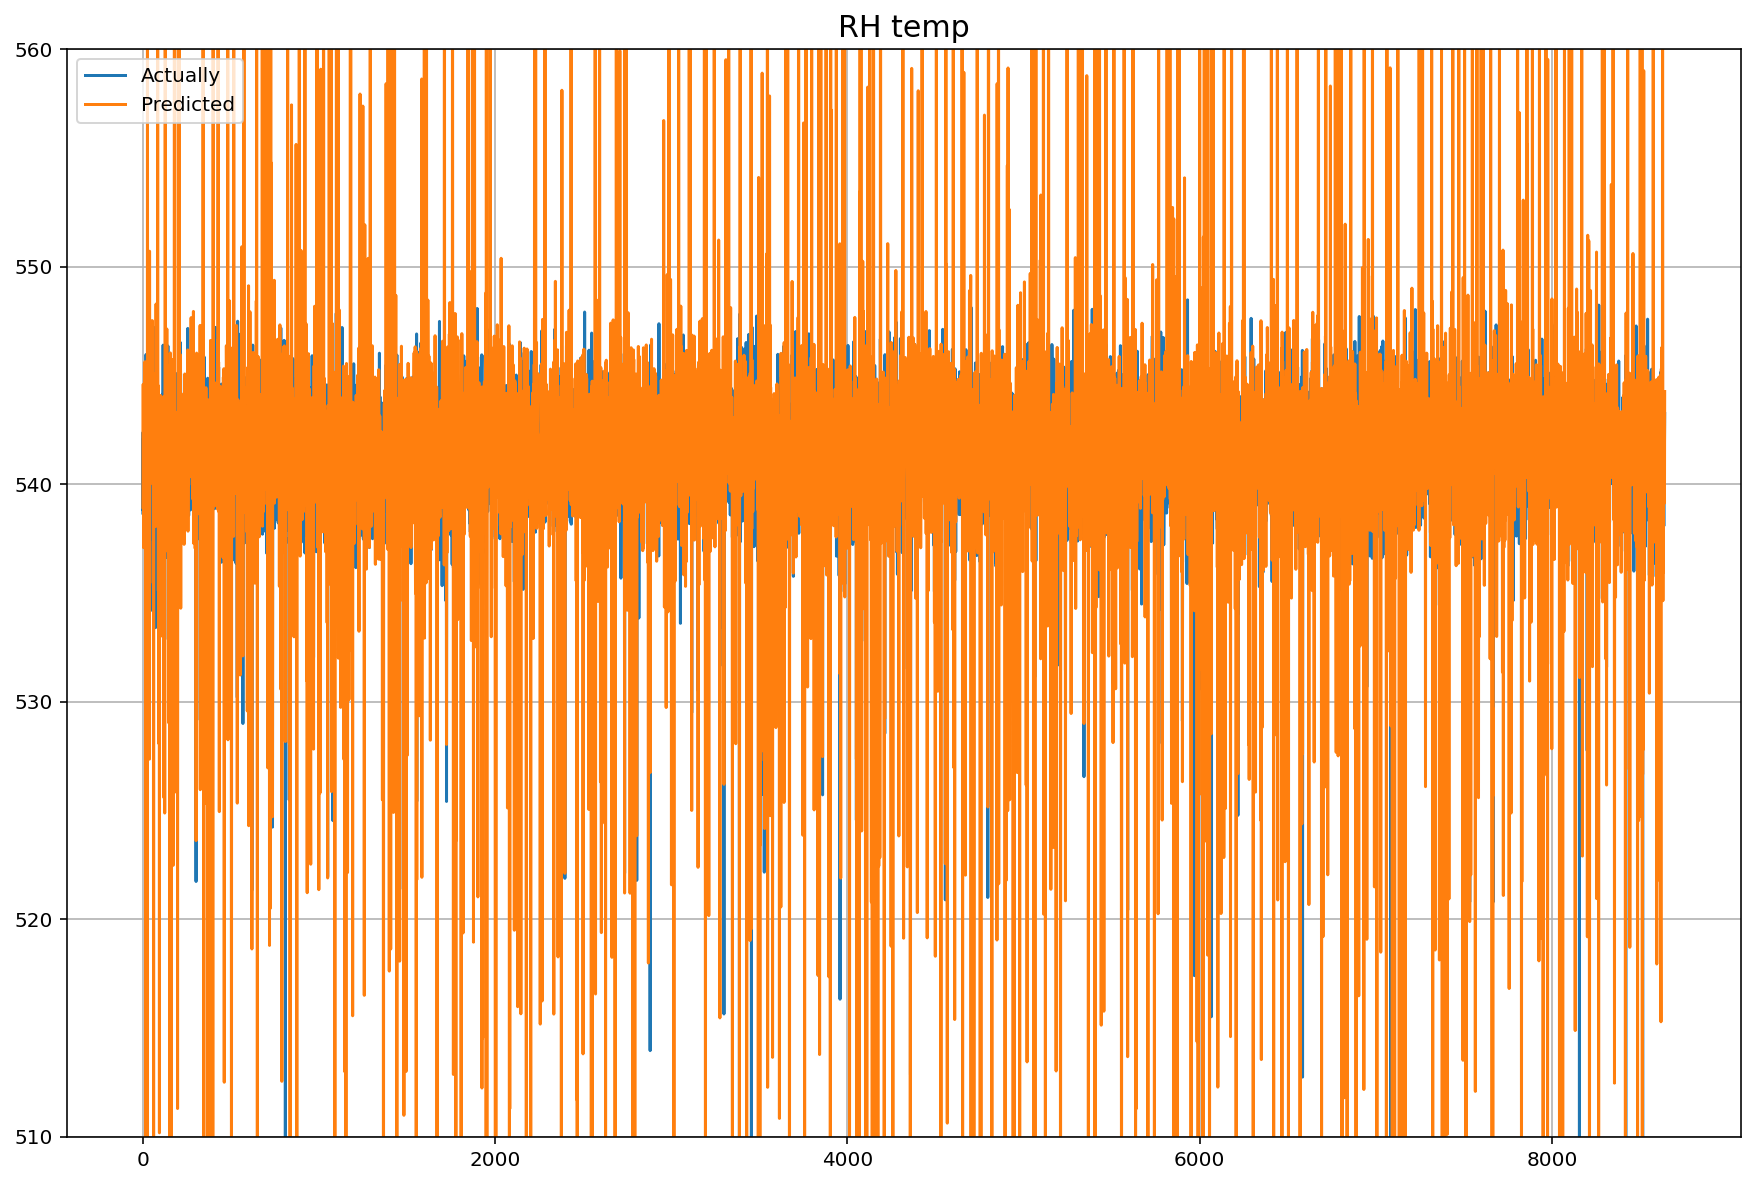

In [60]:
ax = df[['Actually', 'Predicted']].plot()
ax.set_ylim([510, 560])
plt.grid()
plt.title('RH temp', size=15);